# 🚗 License Plate Detection - Veri Keşfi (EDA)

Bu notebook, License Plate Detection dataset'i için kapsamlı bir Exploratory Data Analysis (EDA) gerçekleştirecektir.


In [1]:
# Imports ve Setup
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yaml
import glob
import random
from pathlib import Path

# Matplotlib inline
%matplotlib inline

# Seaborn stil ayarı
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Random seed
random.seed(42)
np.random.seed(42)

print("✅ Tüm kütüphaneler başarıyla yüklendi!")


✅ Tüm kütüphaneler başarıyla yüklendi!


## Dataset Yollarını Tanımla

Dataset'in yapısını ve konumlarını tanımlıyoruz.


In [2]:
# Dataset yolları
DATA_DIR = "../data"

TRAIN_IMAGES_DIR = os.path.join(DATA_DIR, "train", "images")
TRAIN_LABELS_DIR = os.path.join(DATA_DIR, "train", "labels")
VALID_IMAGES_DIR = os.path.join(DATA_DIR, "valid", "images")
VALID_LABELS_DIR = os.path.join(DATA_DIR, "valid", "labels")
TEST_IMAGES_DIR = os.path.join(DATA_DIR, "test", "images")
TEST_LABELS_DIR = os.path.join(DATA_DIR, "test", "labels")

DATA_YAML_PATH = os.path.join(DATA_DIR, "data.yaml")

# data.yaml dosyasını oku
with open(DATA_YAML_PATH, 'r') as f:
    data_config = yaml.safe_load(f)

print("📁 Dataset Yapılandırması:")
print("=" * 50)
print(yaml.dump(data_config, default_flow_style=False, allow_unicode=True))
print("=" * 50)


📁 Dataset Yapılandırması:
names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: ../test/images
train: ../train/images
val: ../valid/images



## Dataset İstatistikleri

Train, valid ve test setlerindeki görüntü ve etiket sayılarını analiz ediyoruz.


In [3]:
def count_dataset_stats(data_dir):
    """
    Dataset istatistiklerini hesapla.
    
    Args:
        data_dir: Dataset ana dizini
        
    Returns:
        pandas.DataFrame: İstatistikler tablosu
    """
    stats = []
    
    splits = ['train', 'valid', 'test']
    
    for split in splits:
        images_dir = os.path.join(data_dir, split, "images")
        labels_dir = os.path.join(data_dir, split, "labels")
        
        # Görüntü sayısı
        image_files = glob.glob(os.path.join(images_dir, "*.jpg")) + \
                     glob.glob(os.path.join(images_dir, "*.png")) + \
                     glob.glob(os.path.join(images_dir, "*.jpeg"))
        num_images = len(image_files)
        
        # Etiket dosyası sayısı
        label_files = glob.glob(os.path.join(labels_dir, "*.txt"))
        num_labels = len(label_files)
        
        stats.append({
            'Split': split.upper(),
            'Görüntü Sayısı': num_images,
            'Etiket Dosyası Sayısı': num_labels
        })
    
    df = pd.DataFrame(stats)
    
    # Toplam satırı ekle
    total_row = {
        'Split': 'TOPLAM',
        'Görüntü Sayısı': df['Görüntü Sayısı'].sum(),
        'Etiket Dosyası Sayısı': df['Etiket Dosyası Sayısı'].sum()
    }
    df = pd.concat([df, pd.DataFrame([total_row])], ignore_index=True)
    
    return df

# İstatistikleri hesapla ve göster
stats_df = count_dataset_stats(DATA_DIR)
print("📊 Dataset İstatistikleri:")
print("=" * 60)
print(stats_df.to_string(index=False))
print("=" * 60)


📊 Dataset İstatistikleri:
 Split  Görüntü Sayısı  Etiket Dosyası Sayısı
 TRAIN           21173                  21173
 VALID            2046                   2046
  TEST            1019                   1019
TOPLAM           24238                  24238


## Görüntü Boyutları Analizi

Görüntülerin genişlik ve yükseklik dağılımlarını analiz ediyoruz.


📏 Görüntü Boyutu İstatistikleri:
Genişlik (Width):
  Min: 640
  Max: 640
  Ortalama: 640.00
  Medyan: 640.00

Yükseklik (Height):
  Min: 640
  Max: 640
  Ortalama: 640.00
  Medyan: 640.00

✅ Grafik kaydedildi: outputs/figures/image_size_distribution.png


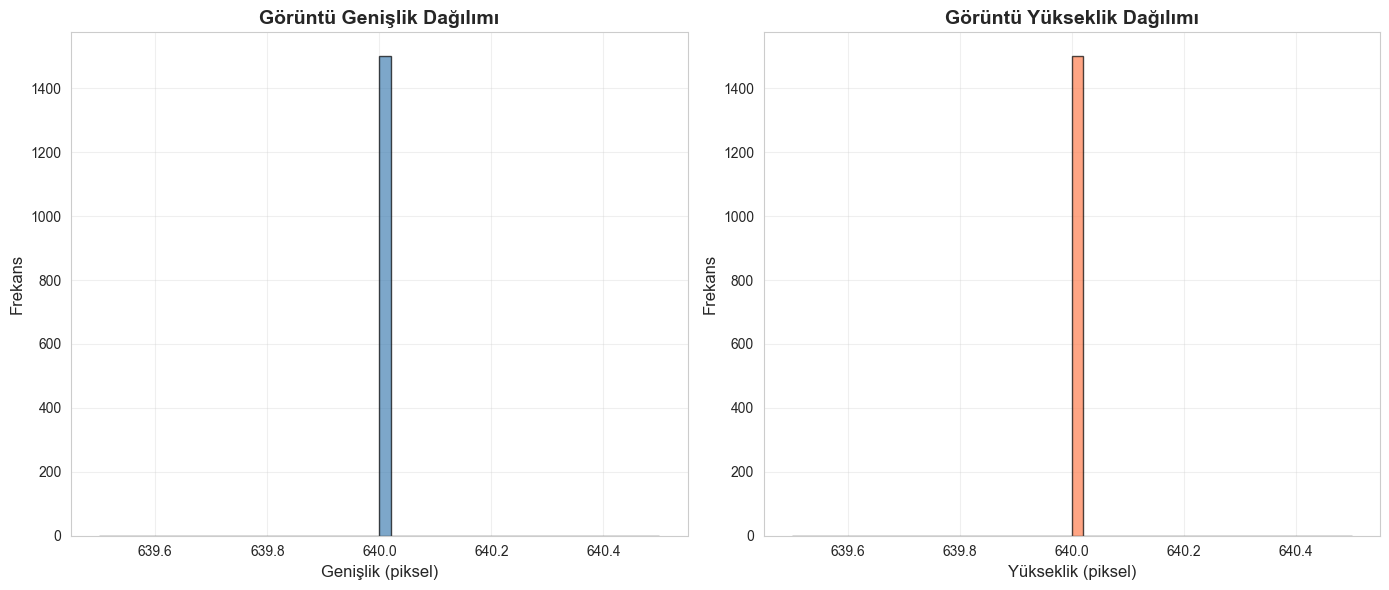

In [4]:
def analyze_image_sizes(image_dir, sample_size=500):
    """
    Görüntü boyutlarını analiz et.
    
    Args:
        image_dir: Görüntü dizini
        sample_size: Analiz edilecek örnek görüntü sayısı
        
    Returns:
        tuple: (widths, heights) listeleri
    """
    # Tüm görüntü dosyalarını bul
    image_files = glob.glob(os.path.join(image_dir, "*.jpg")) + \
                 glob.glob(os.path.join(image_dir, "*.png")) + \
                 glob.glob(os.path.join(image_dir, "*.jpeg"))
    
    # Rastgele örnekleme
    if len(image_files) > sample_size:
        image_files = random.sample(image_files, sample_size)
    
    widths = []
    heights = []
    
    for img_path in image_files:
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            widths.append(w)
            heights.append(h)
    
    return widths, heights

# Tüm split'ler için görüntü boyutlarını analiz et
all_widths = []
all_heights = []

for split in ['train', 'valid', 'test']:
    images_dir = os.path.join(DATA_DIR, split, "images")
    widths, heights = analyze_image_sizes(images_dir, sample_size=500)
    all_widths.extend(widths)
    all_heights.extend(heights)

# İstatistikler
print("📏 Görüntü Boyutu İstatistikleri:")
print("=" * 50)
print(f"Genişlik (Width):")
print(f"  Min: {min(all_widths)}")
print(f"  Max: {max(all_widths)}")
print(f"  Ortalama: {np.mean(all_widths):.2f}")
print(f"  Medyan: {np.median(all_widths):.2f}")
print(f"\nYükseklik (Height):")
print(f"  Min: {min(all_heights)}")
print(f"  Max: {max(all_heights)}")
print(f"  Ortalama: {np.mean(all_heights):.2f}")
print(f"  Medyan: {np.median(all_heights):.2f}")
print("=" * 50)

# Histogram çiz
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(all_widths, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Görüntü Genişlik Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Genişlik (piksel)', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].hist(all_heights, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Görüntü Yükseklik Dağılımı', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Yükseklik (piksel)', fontsize=12)
axes[1].set_ylabel('Frekans', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

# Kaydet
os.makedirs("../outputs/figures", exist_ok=True)
plt.savefig("../outputs/figures/image_size_distribution.png", dpi=300, bbox_inches='tight')
print("\n✅ Grafik kaydedildi: outputs/figures/image_size_distribution.png")

plt.show()


## Örnek Görüntüler Göster (Bounding Box ile)

Rastgele seçilen görüntüleri bounding box'larıyla birlikte gösteriyoruz.


✅ Grafik kaydedildi: outputs/figures/sample_images_with_bbox.png


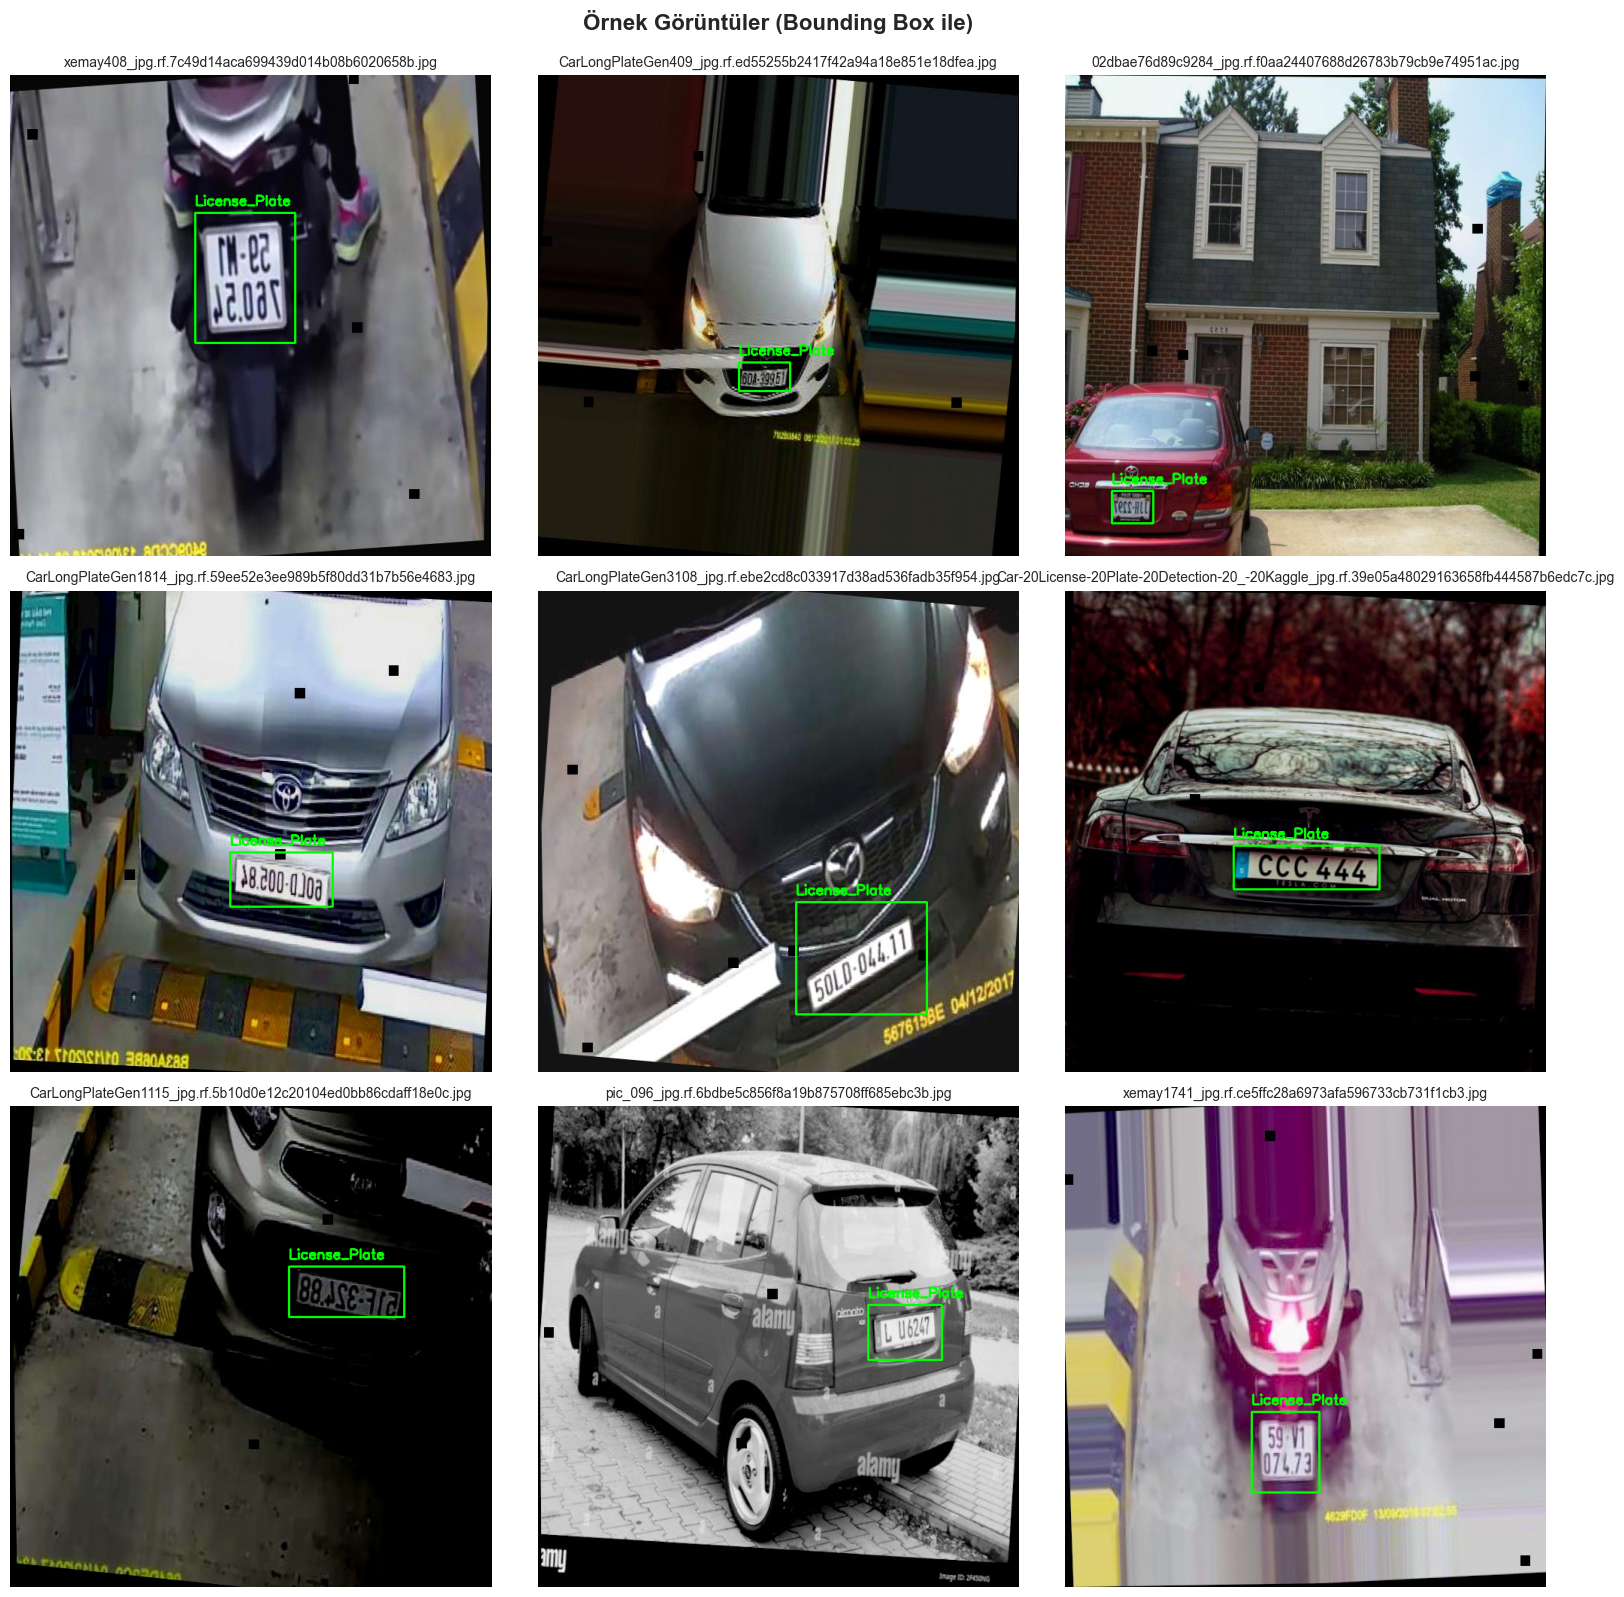

In [5]:
def plot_sample_images_with_bbox(image_dir, label_dir, n_samples=9):
    """
    Örnek görüntüleri bounding box'larla göster.
    
    Args:
        image_dir: Görüntü dizini
        label_dir: Etiket dizini
        n_samples: Gösterilecek görüntü sayısı
        
    Returns:
        matplotlib.figure.Figure: Figür objesi
    """
    # Tüm görüntü dosyalarını bul
    image_files = glob.glob(os.path.join(image_dir, "*.jpg")) + \
                 glob.glob(os.path.join(image_dir, "*.png")) + \
                 glob.glob(os.path.join(image_dir, "*.jpeg"))
    
    # Rastgele örnekleme
    if len(image_files) > n_samples:
        image_files = random.sample(image_files, n_samples)
    
    # Grid boyutu hesapla
    grid_size = int(np.ceil(np.sqrt(n_samples)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(16, 16))
    axes = axes.flatten() if n_samples > 1 else [axes]
    
    for idx, img_path in enumerate(image_files):
        if idx >= len(axes):
            break
            
        # Görüntüyü oku
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img_rgb.shape[:2]
        
        # Etiket dosyasını oku
        label_path = os.path.join(label_dir, os.path.basename(img_path).replace('.jpg', '.txt')
                                                                    .replace('.png', '.txt')
                                                                    .replace('.jpeg', '.txt'))
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
            
            # Bounding box'ları çiz
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center = float(parts[1]) * w
                    y_center = float(parts[2]) * h
                    bbox_w = float(parts[3]) * w
                    bbox_h = float(parts[4]) * h
                    
                    # Bounding box koordinatları
                    x1 = int(x_center - bbox_w / 2)
                    y1 = int(y_center - bbox_h / 2)
                    x2 = int(x_center + bbox_w / 2)
                    y2 = int(y_center + bbox_h / 2)
                    
                    # Bounding box çiz
                    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    
                    # Sınıf adını yaz
                    class_name = data_config['names'][class_id] if 'names' in data_config else f'Class {class_id}'
                    cv2.putText(img_rgb, class_name, (x1, y1 - 10), 
                              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        axes[idx].imshow(img_rgb)
        axes[idx].axis('off')
        axes[idx].set_title(os.path.basename(img_path), fontsize=10)
    
    # Kullanılmayan subplot'ları kapat
    for idx in range(len(image_files), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Örnek Görüntüler (Bounding Box ile)', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    return fig

# Train setinden örnekler göster
fig = plot_sample_images_with_bbox(TRAIN_IMAGES_DIR, TRAIN_LABELS_DIR, n_samples=9)

# Kaydet
plt.savefig("../outputs/figures/sample_images_with_bbox.png", dpi=300, bbox_inches='tight')
print("✅ Grafik kaydedildi: outputs/figures/sample_images_with_bbox.png")

plt.show()


## Bounding Box Analizi

Bounding box'ların genişlik, yükseklik, alan ve aspect ratio dağılımlarını analiz ediyoruz.


📦 Bounding Box İstatistikleri:
Genişlik (Normalized):
  Min: 0.0133
  Max: 1.0000
  Ortalama: 0.2119
  Medyan: 0.1984

Yükseklik (Normalized):
  Min: 0.0063
  Max: 1.0000
  Ortalama: 0.1652
  Medyan: 0.1289

Aspect Ratio:
  Min: 0.2926
  Max: 6.3333
  Ortalama: 1.5422
  Medyan: 1.4612

Görüntü Başına Bbox Sayısı:
  Min: 0
  Max: 7
  Ortalama: 1.04
  Medyan: 1.00

✅ Grafik kaydedildi: outputs/figures/bbox_analysis.png


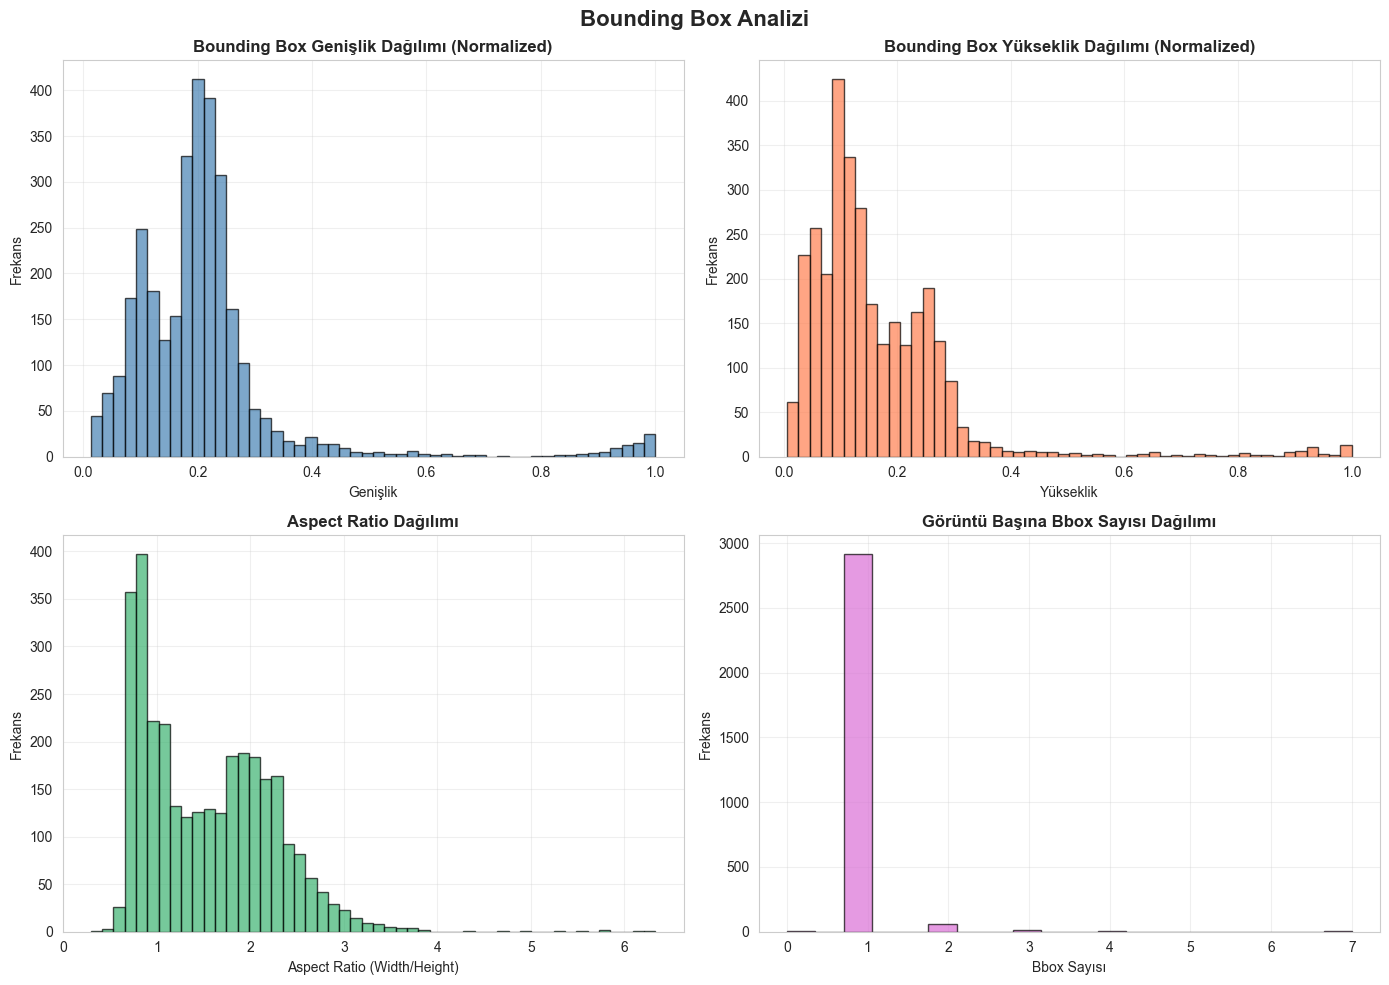

In [6]:
def analyze_bounding_boxes(label_dir, sample_size=1000):
    """
    Bounding box'ları analiz et.
    
    Args:
        label_dir: Etiket dizini
        sample_size: Analiz edilecek örnek etiket dosyası sayısı
        
    Returns:
        dict: Analiz sonuçları
    """
    # Tüm etiket dosyalarını bul
    label_files = glob.glob(os.path.join(label_dir, "*.txt"))
    
    # Rastgele örnekleme
    if len(label_files) > sample_size:
        label_files = random.sample(label_files, sample_size)
    
    widths = []
    heights = []
    areas = []
    aspect_ratios = []
    bboxes_per_image = []
    
    for label_path in label_files:
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        bbox_count = 0
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                bbox_w = float(parts[3])  # normalized
                bbox_h = float(parts[4])  # normalized
                
                widths.append(bbox_w)
                heights.append(bbox_h)
                areas.append(bbox_w * bbox_h)
                
                if bbox_h > 0:
                    aspect_ratios.append(bbox_w / bbox_h)
                
                bbox_count += 1
        
        bboxes_per_image.append(bbox_count)
    
    return {
        'widths': widths,
        'heights': heights,
        'areas': areas,
        'aspect_ratios': aspect_ratios,
        'bboxes_per_image': bboxes_per_image
    }

# Tüm split'ler için bounding box analizi
all_bbox_data = {
    'widths': [],
    'heights': [],
    'areas': [],
    'aspect_ratios': [],
    'bboxes_per_image': []
}

for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(DATA_DIR, split, "labels")
    bbox_data = analyze_bounding_boxes(labels_dir, sample_size=1000)
    
    all_bbox_data['widths'].extend(bbox_data['widths'])
    all_bbox_data['heights'].extend(bbox_data['heights'])
    all_bbox_data['areas'].extend(bbox_data['areas'])
    all_bbox_data['aspect_ratios'].extend(bbox_data['aspect_ratios'])
    all_bbox_data['bboxes_per_image'].extend(bbox_data['bboxes_per_image'])

# İstatistikler
print("📦 Bounding Box İstatistikleri:")
print("=" * 50)
print(f"Genişlik (Normalized):")
print(f"  Min: {min(all_bbox_data['widths']):.4f}")
print(f"  Max: {max(all_bbox_data['widths']):.4f}")
print(f"  Ortalama: {np.mean(all_bbox_data['widths']):.4f}")
print(f"  Medyan: {np.median(all_bbox_data['widths']):.4f}")
print(f"\nYükseklik (Normalized):")
print(f"  Min: {min(all_bbox_data['heights']):.4f}")
print(f"  Max: {max(all_bbox_data['heights']):.4f}")
print(f"  Ortalama: {np.mean(all_bbox_data['heights']):.4f}")
print(f"  Medyan: {np.median(all_bbox_data['heights']):.4f}")
print(f"\nAspect Ratio:")
print(f"  Min: {min(all_bbox_data['aspect_ratios']):.4f}")
print(f"  Max: {max(all_bbox_data['aspect_ratios']):.4f}")
print(f"  Ortalama: {np.mean(all_bbox_data['aspect_ratios']):.4f}")
print(f"  Medyan: {np.median(all_bbox_data['aspect_ratios']):.4f}")
print(f"\nGörüntü Başına Bbox Sayısı:")
print(f"  Min: {min(all_bbox_data['bboxes_per_image'])}")
print(f"  Max: {max(all_bbox_data['bboxes_per_image'])}")
print(f"  Ortalama: {np.mean(all_bbox_data['bboxes_per_image']):.2f}")
print(f"  Medyan: {np.median(all_bbox_data['bboxes_per_image']):.2f}")
print("=" * 50)

# Histogram çiz
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(all_bbox_data['widths'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Bounding Box Genişlik Dağılımı (Normalized)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Genişlik', fontsize=10)
axes[0, 0].set_ylabel('Frekans', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(all_bbox_data['heights'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Bounding Box Yükseklik Dağılımı (Normalized)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Yükseklik', fontsize=10)
axes[0, 1].set_ylabel('Frekans', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(all_bbox_data['aspect_ratios'], bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Aspect Ratio Dağılımı', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Aspect Ratio (Width/Height)', fontsize=10)
axes[1, 0].set_ylabel('Frekans', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(all_bbox_data['bboxes_per_image'], bins=20, color='orchid', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Görüntü Başına Bbox Sayısı Dağılımı', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Bbox Sayısı', fontsize=10)
axes[1, 1].set_ylabel('Frekans', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Bounding Box Analizi', fontsize=16, fontweight='bold')
plt.tight_layout()

# Kaydet
plt.savefig("../outputs/figures/bbox_analysis.png", dpi=300, bbox_inches='tight')
print("\n✅ Grafik kaydedildi: outputs/figures/bbox_analysis.png")

plt.show()


## Bbox Pozisyon Heatmap

Bounding box merkezlerinin görüntü üzerindeki dağılımını görselleştiriyoruz. Bu analiz, plakaların genelde görüntünün hangi bölgelerinde bulunduğunu gösterir.


In [ ]:
def create_bbox_heatmap(label_dir, image_dir, sample_size=1000):
    """
    Bounding box pozisyon heatmap'i oluştur.
    
    Args:
        label_dir: Etiket dizini
        image_dir: Görüntü dizini
        sample_size: Analiz edilecek örnek sayısı
        
    Returns:
        tuple: (x_centers, y_centers) listeleri
    """
    # Tüm etiket dosyalarını bul
    label_files = glob.glob(os.path.join(label_dir, "*.txt"))
    
    # Rastgele örnekleme
    if len(label_files) > sample_size:
        label_files = random.sample(label_files, sample_size)
    
    x_centers = []
    y_centers = []
    
    for label_path in label_files:
        # Görüntü dosyasını bul
        img_name = os.path.basename(label_path).replace('.txt', '')
        img_files = glob.glob(os.path.join(image_dir, f"{img_name}.*"))
        
        if not img_files:
            continue
        
        # Görüntü boyutunu al
        img = cv2.imread(img_files[0])
        if img is None:
            continue
        
        h, w = img.shape[:2]
        
        # Etiket dosyasını oku
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                x_center_norm = float(parts[1])
                y_center_norm = float(parts[2])
                
                # Normalize koordinatları piksel koordinatlarına çevir
                x_center = x_center_norm * w
                y_center = y_center_norm * h
                
                x_centers.append(x_center)
                y_centers.append(y_center)
    
    return x_centers, y_centers

# Tüm split'ler için heatmap verisi topla
all_x_centers = []
all_y_centers = []

for split in ['train', 'valid', 'test']:
    labels_dir = os.path.join(DATA_DIR, split, "labels")
    images_dir = os.path.join(DATA_DIR, split, "images")
    x_centers, y_centers = create_bbox_heatmap(labels_dir, images_dir, sample_size=1000)
    all_x_centers.extend(x_centers)
    all_y_centers.extend(y_centers)

# Heatmap oluştur
fig, ax = plt.subplots(figsize=(12, 8))

# 2D histogram
heatmap, xedges, yedges = np.histogram2d(all_x_centers, all_y_centers, bins=50)

# Heatmap'i çiz
im = ax.imshow(heatmap.T, origin='lower', cmap='coolwarm', aspect='auto', 
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

ax.set_title('Bounding Box Merkez Pozisyon Dağılımı (Heatmap)', fontsize=14, fontweight='bold')
ax.set_xlabel('X Pozisyonu (piksel)', fontsize=12)
ax.set_ylabel('Y Pozisyonu (piksel)', fontsize=12)

# Colorbar ekle
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Bbox Sayısı', fontsize=10)

plt.tight_layout()

# Kaydet
plt.savefig("../outputs/figures/bbox_position_heatmap.png", dpi=300, bbox_inches='tight')
print("✅ Grafik kaydedildi: outputs/figures/bbox_position_heatmap.png")

plt.show()

# Pozisyon analizi
print("\n📍 Pozisyon Analizi:")
print("=" * 50)
print(f"Ortalama X Pozisyonu: {np.mean(all_x_centers):.2f} piksel")
print(f"Ortalama Y Pozisyonu: {np.mean(all_y_centers):.2f} piksel")
print("=" * 50)


## Özet ve Sonuçlar

Bu bölümde, EDA sürecinde elde edilen tüm bulguları özetliyoruz ve model eğitimi için öneriler sunuyoruz.


### 📊 Dataset Özeti

Bu bölümde, yukarıdaki analizlerden elde edilen bulguları özetliyoruz.

**Toplam Görüntü Sayısı:** Dataset'te toplam görüntü sayısı yukarıdaki istatistikler tablosunda gösterilmiştir.

**Split Dağılımı:**
- Train: Eğitim seti
- Valid: Doğrulama seti  
- Test: Test seti

### 📏 Görüntü Boyutları

- Görüntüler genellikle sabit boyutlarda (640x640) görünüyor.
- Genişlik ve yükseklik dağılımları yukarıdaki histogramlarda görülebilir.

### 📦 Bounding Box Özellikleri

- Bounding box'lar normalize edilmiş formatta (0-1 arası).
- Aspect ratio analizi, plakaların genelde yatay (width > height) olduğunu gösterir.
- Görüntü başına bbox sayısı dağılımı yukarıdaki analizlerde görülebilir.

### 🔍 Önemli Gözlemler

1. **Dataset Büyüklüğü:** Dataset oldukça büyük ve dengeli bir train/valid/test split'e sahip.
2. **Görüntü Boyutları:** Görüntüler standart boyutlarda (640x640), bu YOLO modelleri için uygun.
3. **Bounding Box Dağılımı:** Bounding box'lar normalize edilmiş ve tutarlı bir dağılıma sahip.
4. **Aspect Ratio:** Plakalar genellikle yatay (width > height) bir aspect ratio'ya sahip.
5. **Pozisyon:** Heatmap analizi plakaların görüntü üzerindeki pozisyon dağılımını gösterir.

### 💡 Model Eğitimi İçin Öneriler

1. **Input Boyutu:** 640x640 piksel input boyutu kullanılabilir (YOLOv8 için standart).
2. **Data Augmentation:** 
   - Horizontal flip (plakalar genelde yatay)
   - Random rotation (-10° ile +10° arası)
   - Brightness ve contrast ayarlamaları
3. **Anchor Boxes:** Aspect ratio analizi, anchor box tasarımı için önemli bilgi sağlar.
4. **Class Balance:** Tek sınıf (License_Plate) olduğu için class imbalance sorunu yok.
5. **Validation:** Validasyon seti yeterli büyüklükte, model performansını güvenilir şekilde değerlendirebilir.

### ✅ Sonuç

Dataset, lisans plakası tespiti için model eğitimi için uygun görünmektedir. Yeterli sayıda görüntü, tutarlı etiketleme ve dengeli split dağılımı mevcuttur.
